In [2]:
#RNN ile Doğal Dil Işleme kullanarak Duygu (sentiment) Analizi

In [3]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding, SimpleRNN
from keras.preprocessing import sequence
import tensorflow as tf

In [4]:
num_words = 5000 #en çok kullandığım kelimeleri çekicez
(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words=num_words)

In [5]:
print(X_train)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 

In [6]:
print(X_train.shape)

(25000,)


In [7]:
max_kelime = 500
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen = max_kelime)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen = max_kelime)
print('Eğitim Kümesinin son hali: \n',X_train)

Eğitim Kümesinin son hali: 
 [[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 ...
 [   0    0    0 ...    4 3586    2]
 [   0    0    0 ...   12    9   23]
 [   0    0    0 ...  204  131    9]]


In [8]:
print(X_train.shape)

(25000, 500)


In [9]:
#Model Mimarisi
ky_vektor_uzunlugu = 32
model = Sequential()
model.add(Embedding(num_words,ky_vektor_uzunlugu))
model.add(SimpleRNN(64))
model.add(Dense(1,activation='sigmoid'))


In [10]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics = ['accuracy']
)

In [11]:
tf.keras.utils.plot_model(model,'IMDB_RNN.png',show_shapes=True,show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          160000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                6208      
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 166,273
Trainable params: 166,273
Non-trainable params: 0
_________________________________________________________________


In [14]:
history2 = model.fit(
    X_train,
    y_train,
    epochs = 10,
    batch_size = 512,
    validation_split = 0.2
)

Epoch 1/10
40/40 [==============================] - 33s 793ms/step - loss: 0.6860 - accuracy: 0.5489 - val_loss: 0.6796 - val_accuracy: 0.5982
Epoch 2/10
40/40 [==============================] - 32s 807ms/step - loss: 0.6757 - accuracy: 0.6104 - val_loss: 0.6804 - val_accuracy: 0.5528
Epoch 3/10
40/40 [==============================] - 33s 817ms/step - loss: 0.6705 - accuracy: 0.6212 - val_loss: 0.6732 - val_accuracy: 0.6062
Epoch 4/10
40/40 [==============================] - 32s 791ms/step - loss: 0.6639 - accuracy: 0.6464 - val_loss: 0.6672 - val_accuracy: 0.6070
Epoch 5/10
40/40 [==============================] - 34s 848ms/step - loss: 0.6543 - accuracy: 0.6594 - val_loss: 0.6577 - val_accuracy: 0.6290
Epoch 6/10
40/40 [==============================] - 35s 870ms/step - loss: 0.6411 - accuracy: 0.6711 - val_loss: 0.6469 - val_accuracy: 0.6348
Epoch 7/10
40/40 [==============================] - 35s 867ms/step - loss: 0.6226 - accuracy: 0.6884 - val_loss: 0.6312 - val_accuracy: 0.6454

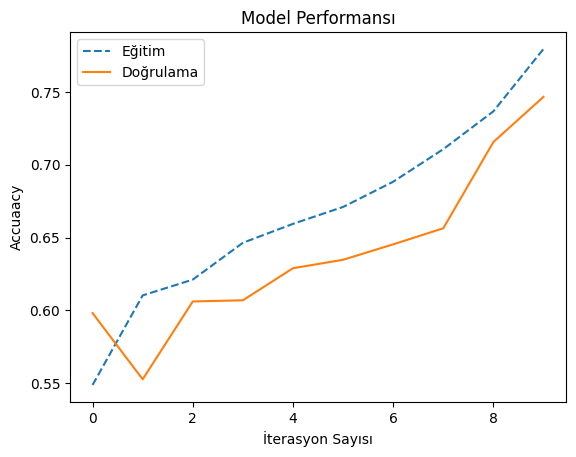

In [15]:
import matplotlib.pyplot as plt
plt.plot(history2.history['accuracy'],'--')
plt.plot(history2.history['val_accuracy'])
plt.title('Model Performansı')
plt.ylabel('Accuaacy')
plt.xlabel('İterasyon Sayısı')
plt.legend(['Eğitim','Doğrulama'],loc='upper left')
plt.show()

In [16]:
performans = model.evaluate(X_test,y_test,verbose=0)
print('Modelin doğruluğu: %.2f%%' % (performans[1]*100))

Modelin doğruluğu: 75.04%
